In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv']


In [28]:
from fastai import *
from fastai.tabular import *

In [29]:
df_train = pd.read_csv('../input/train.csv')
df_train.head()

,YEAR,MVP,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,2016,1,Russell Westbrook,81,34.6,31.6,10.2,24.0,42.5,2.5,7.2,34.3,8.8,10.4,84.5,1.7,9.0,10.7,10.4,1.6,0.4,5.4,33.8
1,2016,0,James Harden,81,36.4,29.1,8.3,18.9,44.0,3.2,9.3,34.7,9.2,10.9,84.7,1.2,7.0,8.1,11.2,1.5,0.5,5.7,32.4
2,2016,0,Isaiah Thomas,76,33.8,28.9,9.0,19.4,46.3,3.2,8.5,37.9,7.8,8.5,90.9,0.6,2.1,2.7,5.9,0.9,0.2,2.8,24.7
3,2016,0,Anthony Davis,75,36.1,28.0,10.3,20.3,50.5,0.5,1.8,29.9,6.9,8.6,80.2,2.3,9.5,11.8,2.1,1.3,2.2,2.4,31.1
4,2016,0,DeMar DeRozan,74,35.4,27.3,9.7,20.9,46.7,0.4,1.7,26.6,7.4,8.7,84.2,0.9,4.3,5.2,3.9,1.1,0.2,2.4,22.7


In [30]:
df_test = pd.read_csv('../input/test.csv')
df_test.head()

,YEAR,MVP,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,2017,1,James Harden,72,35.4,30.4,9.0,20.1,44.9,3.7,10.0,36.7,8.7,10.1,85.8,0.6,4.8,5.4,8.8,1.8,0.7,4.4,30.1
1,2017,0,Anthony Davis,75,36.4,28.1,10.4,19.5,53.4,0.7,2.2,34.0,6.6,8.0,82.8,2.5,8.6,11.1,2.3,1.5,2.6,2.2,33.0
2,2017,0,LeBron James,82,36.9,27.5,10.5,19.3,54.2,1.8,5.0,36.7,4.7,6.5,73.1,1.2,7.5,8.6,9.1,1.4,0.9,4.2,32.7
3,2017,0,Damian Lillard,73,36.6,26.9,8.5,19.4,43.9,3.1,8.6,36.1,6.8,7.4,91.6,0.8,3.6,4.5,6.6,1.1,0.4,2.8,25.0
4,2017,0,Giannis Antetokounmpo,75,36.7,26.9,9.9,18.7,52.9,0.6,1.9,30.7,6.5,8.5,76.0,2.1,8.0,10.0,4.8,1.5,1.4,3.0,30.7


In [31]:
dep_var = 'MVP'
cont_vars = ['GP', 'PTS', 'PTS', 'FGM', 'FGA', 'FG%','3PM','3PA','3P%','FTM','FTA','FT%','OREB','DREB','REB','AST','STL','BLK','TOV','EFF']
cat_vars = ['YEAR']
procs = [FillMissing, Categorify, Normalize]

In [32]:
valid_idx = range(len(df_train)-1000,len(df_train)-700)
data = (TabularList.from_df(df_train, procs=procs, cont_names=cont_vars, cat_names=cat_vars)
        .split_by_idx(valid_idx)
        .label_from_df(cols=dep_var)
        .add_test(TabularList.from_df(df_test, cat_names=cat_vars, cont_names=cont_vars, procs=procs))
        .databunch())
print(data.train_ds.cont_names)
print(data.train_ds.cat_names)

['GP', 'PTS', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'EFF']
['YEAR']


In [33]:
learn = tabular_learner(data, layers=[1000,500], metrics=accuracy)

In [34]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 9)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=29, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=1000, out_features=500, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=500, out_features=2, bias=True)
  )
)

In [35]:
data.show_batch(rows=20)

YEAR,GP,PTS,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,target
2008,0.8905,-0.9693,-0.9693,-1.0364,-1.0246,-0.2440,-0.6550,-0.6938,0.0965,-0.0630,-0.1662,0.4870,-0.2489,-0.7197,-0.6013,1.1036,0.1188,-0.7541,-0.2059,-0.3539,0
2007,-0.2987,2.6656,2.6656,2.1597,2.3082,0.0181,0.8373,1.1844,0.3155,2.0619,2.6353,-1.1430,0.0349,0.7722,0.5615,1.4069,1.1047,0.5758,1.2647,2.1647,0
1991,-0.8083,-0.2795,-0.2795,-0.4806,-1.0246,1.3049,-0.8846,-0.9174,0.2129,0.6674,0.6795,-0.0564,-0.8164,-1.2491,-1.1485,-0.2393,0.7103,-0.9019,0.2353,-0.7481,0
1986,0.7206,-0.5979,-0.5979,-0.1332,0.0260,-0.4108,-0.6550,-0.6938,0.0144,-0.7934,-0.6948,-0.5568,0.5078,-0.7679,-0.3619,0.5405,3.8651,-0.4586,0.6765,-0.2006,0
1990,0.2109,-0.5979,-0.5979,-0.5500,-0.9521,0.8759,-0.1958,-0.2019,0.6440,-0.3286,-0.4834,0.7443,-1.1948,-1.3935,-1.4221,1.3636,0.3160,-0.9019,0.6765,-0.4196,0
2014,0.7206,-0.6775,-0.6775,-0.6890,-0.8434,0.2564,-0.8846,-0.8727,-0.6357,0.0698,0.0452,0.0437,-0.3435,0.9166,0.5273,-0.0660,-0.6699,1.3146,-0.5000,0.2374,0
2011,-2.8469,-0.4387,-0.4387,-0.2721,-0.2638,-0.0772,-0.6550,-0.5150,-0.2662,-0.2622,-0.3248,0.1009,-1.2894,-0.9604,-1.1485,1.6235,-0.4727,-0.9019,0.0882,-0.3977,0
1986,0.8905,0.2246,0.2246,0.9785,0.6781,0.6615,-0.8846,-0.9622,-1.8401,-0.7934,-0.3776,-1.8579,0.7916,0.6760,0.7667,-0.4992,0.7103,0.4280,-0.6470,0.4783,0
1992,-0.9782,0.0654,0.0654,-0.1332,-0.9883,2.0912,-0.8846,-0.9622,1.5815,0.8667,0.8381,0.0437,0.5078,1.6385,1.3481,0.1939,-1.0642,0.1325,-0.6470,1.5076,0
1991,0.2109,-0.7571,-0.7571,-0.4806,-0.2276,-0.6968,-0.8846,-0.9174,-0.4715,-0.3950,-0.3248,-0.3137,0.1295,0.8203,0.6299,0.1506,0.9075,1.4623,0.3823,0.1279,0


In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


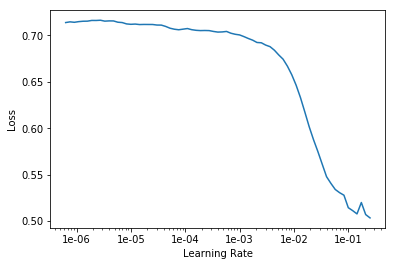

In [37]:
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.647305,0.896718,0.260000,00:00
1,0.353445,0.303463,0.980000,00:00
2,0.252169,0.071844,0.983333,00:00
3,0.180281,0.256663,0.980000,00:00
4,0.139505,0.315794,0.980000,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


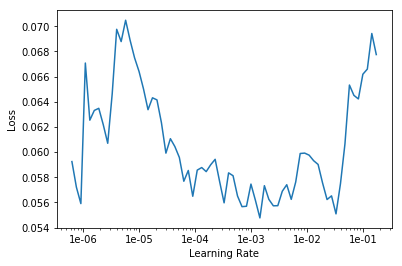

In [39]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.042534,0.109158,0.980000,00:00
1,0.044992,0.174827,0.980000,00:00
2,0.044691,0.338943,0.980000,00:00
3,0.043763,0.211636,0.980000,00:00
4,0.045159,0.283905,0.980000,00:00
5,0.045120,0.371997,0.980000,00:00
6,0.042386,0.439071,0.980000,00:00
7,0.038566,0.504322,0.980000,00:00
8,0.036450,0.513892,0.980000,00:00
9,0.036075,0.510714,0.980000,00:00


In [25]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
pred_prob, pred_class = preds.max(1)

submission = pd.DataFrame({'PLAYER':df_test['PLAYER'],'MVP':pred_class})

In [26]:
submission.to_csv('submission-fastai.csv')

In [ ]:
submission